In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Objective Understanding

* [Link 1](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016)
* [Link 2](https://www.who.int/news-room/fact-sheets/detail/suicide)

# Data Understanding

Luckily, required dataset can found on Kaggle and Our World in Data. The below links represent where our projects retrieve data from.
* [Kaggle - Suicide Rate Dataset](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016)
* [Our World in Data - HDI Dataset](https://ourworldindata.org/human-development-index)
* [Variable Description](https://docs.google.com/spreadsheets/d/1PPbMPrkpixVaY9v0tkprudtyn-AFF6Plu0a2s66v9vw/edit?usp=sharing)

Some questions that pop up in our mind from this early process. The questions are as followed:
* Which country has the highest suicide rate for the 100,000 population?
* Gender ratio of those who committed suicide?
* Suicide rates of generation?
* How old were those who committed suicide?

# Data Preparation

### Initial Data Checking

##### --- Suicide Data Set ---

In [2]:
suicide = pd.read_csv('./data/master.csv')

In [3]:
suicide.shape

(27820, 12)

In [4]:
suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
len(suicide.country.unique())

101

There are 101 countries in the suicide dataset

In [7]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
suicide.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [9]:
print(f"The 'HDI for year' column has null accounting for {round(suicide['HDI for year'].isnull().sum()/len(suicide['HDI for year']), 4)*100}%")

The 'HDI for year' column has null accounting for 69.94%


Almost 70% of the HDI data is missing value, so we will handle this issue later on in data cleaning process

In [10]:
suicide.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


There are three points to consider: 
* is the minimum number of suicidals 0? Does it actually make sense?
* The whole population of 278 people per country? Is it reliable?
* Again, due to the minimum number of suicidals being at the lowest of 0, the suicides/100k pop is also 0. Is it legitimate?

##### --- HDI Data Set ---

Now It's time to deal with the aforementioned missing values

In [11]:
hdi = pd.read_csv('./data/hdi.csv')

In [12]:
hdi.shape

(5923, 4)

In [13]:
hdi.sample(10)

,Entity,Code,Year,Human Development Index
13,Afghanistan,AFG,2003,0.376
3692,Myanmar,MMR,2005,0.460
3029,Liberia,LBR,2010,0.460
615,Bolivia,BOL,2004,0.626
3534,Moldova,MDA,1994,0.614
2063,Greece,GRC,2007,0.858
1389,Denmark,DNK,2000,0.889
4294,Portugal,PRT,2019,0.867
3504,Mexico,MEX,2018,0.777
4834,South Africa,ZAF,2011,0.686


In [14]:
hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5923 entries, 0 to 5922
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   5923 non-null   object 
 1   Code                     5603 non-null   object 
 2   Year                     5923 non-null   int64  
 3   Human Development Index  5923 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 185.2+ KB


Only 'Code' column has null values, and this does not matter at tall since it's going to be dropped

In [15]:
hdi.columns

Index(['Entity', 'Code', 'Year', 'Human Development Index'], dtype='object')

##### --- GPS-Dataset --- 

In [16]:
gps = pd.read_csv("./data/concap.csv")

In [17]:
gps.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [18]:
# check for missing countries
suicide_countries = suicide.country.unique().tolist()
gps_countries = gps.CountryName.unique().tolist()

missing_countries = set([country for country in suicide_countries if country not in gps_countries])
for i in missing_countries:
    print("Missing : {}".format(i))

Missing : Russian Federation
Missing : Saint Vincent and Grenadines
Missing : Cabo Verde
Missing : Republic of Korea


In [19]:
# update names in the suicide dataset to the gps dataset
suicide.replace({'Cabo Verde':'Cape Verde',
                 'Republic of Korea':'South Korea',
                 'Russian Federation':'Russia',
                 'Saint Vincent and Grenadines':'Saint Vincent and the Grenadines'},
                inplace=True)

In [20]:
#join the dataset using the country names as key
suicide = suicide.join(gps.set_index('CountryName'), on='country')

In [21]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Tirana,41.316667,19.816667,AL,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Tirana,41.316667,19.816667,AL,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Tirana,41.316667,19.816667,AL,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Tirana,41.316667,19.816667,AL,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Tirana,41.316667,19.816667,AL,Europe


### Data Cleaning

##### --- Modifying columns'name in both datasets to them make easier to access for the upcoming tasks ---

In [22]:
hdi.columns = [col.lower().strip().replace(' ', '_') for col in hdi.columns]
suicide.columns = [col.lower().strip().replace(' ', '_') for col in suicide.columns]

In [23]:
print(hdi.columns, suicide.columns, sep='\n\n')

Index(['entity', 'code', 'year', 'human_development_index'], dtype='object')

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'country-year', 'hdi_for_year', 'gdp_for_year_($)',
       'gdp_per_capita_($)', 'generation', 'capitalname', 'capitallatitude',
       'capitallongitude', 'countrycode', 'continentname'],
      dtype='object')


In [24]:
hdi = hdi.rename(columns={'human_development_index':'hdi', 'entity':'country'})
suicide = suicide.rename(columns={'entity':'country', 'hdi_for_year':'hdi',
                                 'gdp_for_year_($)': 'gdp_for_year',
                                 'gdp_per_capita_($)': 'gdp_per_capita',
                                 'capitalname':'capital_name',
                                 'capitallatitude':'capital_lattitude',
                                 'capitallongitude':'capital_longitude',
                                 'countrycode':'country_code',
                                 'continentname':'continent_name'})

In [25]:
print(hdi.columns, suicide.columns, sep='\n\n')

Index(['country', 'code', 'year', 'hdi'], dtype='object')

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'country-year', 'hdi', 'gdp_for_year',
       'gdp_per_capita', 'generation', 'capital_name', 'capital_lattitude',
       'capital_longitude', 'country_code', 'continent_name'],
      dtype='object')


##### --- Eliminating some unrequired features in both datasets ---

In [26]:
hdi = hdi.drop(columns=['code'])
suicide = suicide.drop(columns=['country-year', 'country_code', 'capital_name'])

In [27]:
print(hdi.columns, suicide.columns, sep='\n\n')

Index(['country', 'year', 'hdi'], dtype='object')

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'hdi', 'gdp_for_year', 'gdp_per_capita',
       'generation', 'capital_lattitude', 'capital_longitude',
       'continent_name'],
      dtype='object')


##### --- Check for null, missing and zero values ---

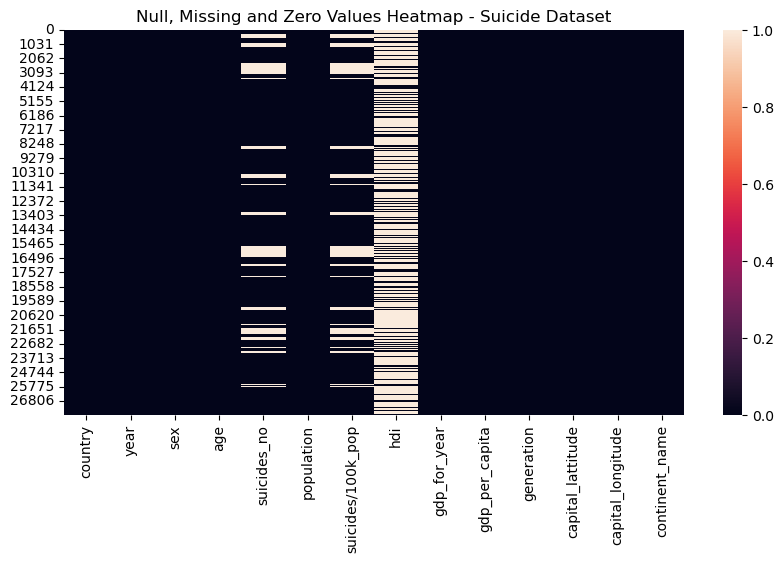

In [28]:
plt.figure(figsize=(10,5), dpi=100)
plt.title("Null, Missing and Zero Values Heatmap - Suicide Dataset")
sns.heatmap((suicide.isnull()) | (suicide == 0))
plt.show()

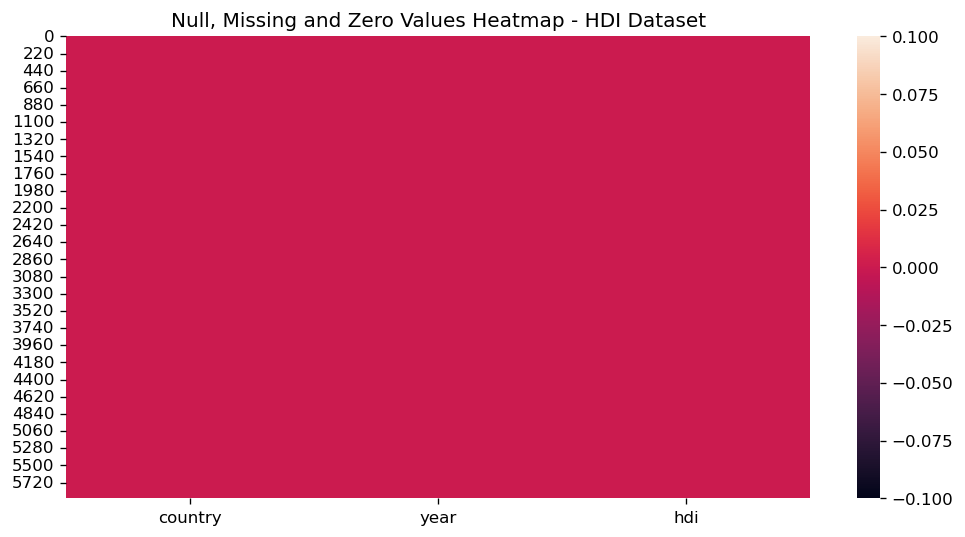

In [29]:
plt.figure(figsize=(10,5), dpi=120)
plt.title("Null, Missing and Zero Values Heatmap - HDI Dataset")
sns.heatmap((hdi.isnull()) | (hdi == 0))
plt.show()

##### --- Duplicate Value Checking --- 

In [30]:
print("Duplicate Value Count: ", suicide.duplicated().sum())

Duplicate Value Count:  0


##### --- Dealing with missing values of HDI ---

* The Human Development Index is a slow moving index (We might need a visual evidence for this statment???)
* There are 2 steps to implement:
<ol>
    <li>use the hdi, retrieved from Our World in Data website, to fill those missing values based on country and year</li>
    <li>if there are any missing values left, we will use forward filling technique</li>
</ol>
* Note that : Using forward filling technique will not significantly impact the analysis

In [31]:
# drop HDI feature in suicide dataset before merging
suicide = suicide.drop(columns='hdi')

##### ------ Implementing the first step ------

In [32]:
# We will merge those two dataframes without eliminating any rows in suicide dataset (suicide dataset left join hdi dataset)
df = pd.merge(suicide, hdi, how='left', on=['country', 'year'])

In [33]:
df.isnull().sum()

country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k_pop       0
gdp_for_year            0
gdp_per_capita          0
generation              0
capital_lattitude       0
capital_longitude       0
continent_name          0
hdi                  5086
dtype: int64

In [34]:
remaining_null = df['hdi'].isnull().sum()/len(df['hdi'])
print(f"Remaining missing values of HDI data is about {round(remaining_null,4)*100}%")

Remaining missing values of HDI data is about 18.279999999999998%


The null proportion dramatically decreases from alomost 70% to 21.26%, showing a decrease by roughly 50%

##### ------ Implementing the second step ------

In [35]:
df['hdi'].fillna(method='bfill', inplace=True)

In [36]:
remaining_null = df['hdi'].isnull().sum()/len(df['hdi'])
print(f"Remaining missing values of HDI data is about {round(remaining_null,4)*100}%")

Remaining missing values of HDI data is about 0.0%


##### --- Check how much of data is collected in each year ---

In [37]:
years = list(df['year'].unique())
data_count = [len(df[df['year'] == year]) for year in years]

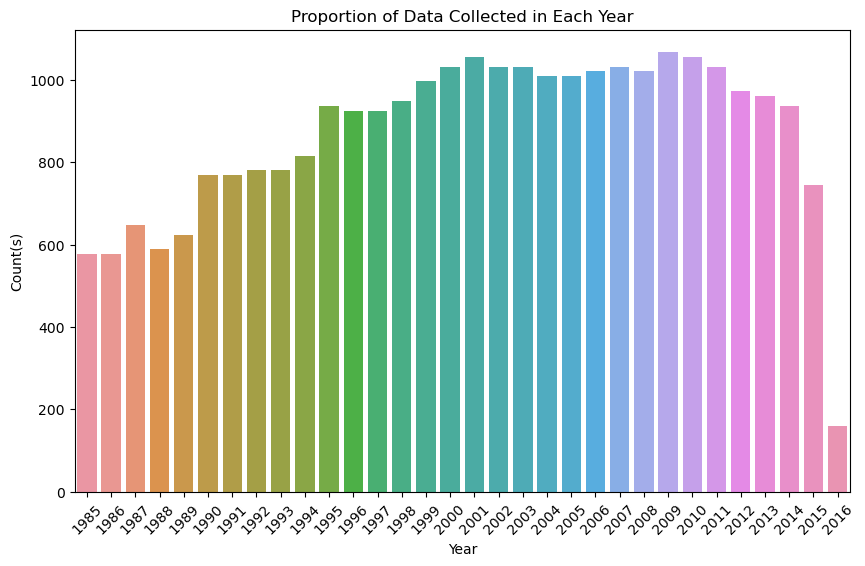

In [38]:
#visualise the difference in each year
plt.figure(figsize=(10,6), dpi=100)
plt.title("Proportion of Data Collected in Each Year")
plt.xlabel("Year")
plt.ylabel("Count(s)")
ax = sns.barplot(x=years, y=data_count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

Since there is significantly less data collected in 2016 as opposed to other years, so we will exclude the 2016 data from our analysis.

In [39]:
df.drop(df[df['year'] == 2016].index, inplace=True)

##### --- Dealing with zero values in suicides_no and suicides/100k_pop columns ---


According to statistics from [World Population Review](https://worldpopulationreview.com/country-rankings/suicide-rate-by-country), we decide to the fill those nulls with the mean which is calculated based country column, despite the fact that some countries may have zero suicidals due to cultural, religious or polical reasons.

In [40]:
df['suicides_no'] = df.groupby('country')['suicides_no'].transform(lambda x: x.replace(0, np.ceil(x.mean())))
df['suicides/100k_pop'] = df.groupby('country')['suicides/100k_pop'].transform(lambda x: x.replace(0, np.ceil(x.mean())))

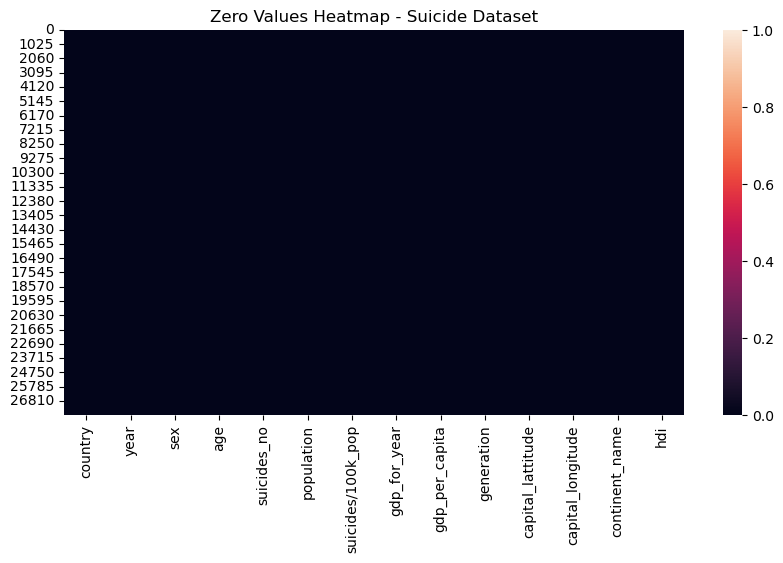

In [41]:
#recheck if there is any remaining zero values
plt.figure(figsize=(10,5), dpi=100)
plt.title("Zero Values Heatmap - Suicide Dataset")
sns.heatmap(df == 0)
plt.show()

# Modeling

In this data mining, we have decided to utilise predictive method, so it is unavoidably to conduct an exploratory data analysis so as to gain either possibly useful insights or an importance of each variable; this will surely help us make a better decision to choose a machine learning algorithm.

### Data Overview (Before EDA Process)

According to this [worldometer](https://www.worldometers.info/world-population/population-by-country/), we have ten most populous countries in the world listed below

In [42]:
# top 10 populous countries in the world
top10 = ['China','India','United States','Indonesia','Brazil','Pakistan','Nigeria','Bangladesh','Russia','Mexico']

in_set = df[df['country'].isin(top10)]['country'].unique().tolist()

print(f'Only {len(in_set)} countries are present in our final dataset', in_set, sep='\n\n')

Only 4 countries are present in our final dataset

['Brazil', 'Mexico', 'Russia', 'United States']


In [43]:
#how many countries are there in the dataset? What continent are they on? How long does the dataset collected?
print('Dataset has', len(df.country.unique()), 'countries on', len(df.continent_name.unique()), 
      'continents spanning', len(df.year.unique()), 'years.')

Dataset has 100 countries on 7 continents spanning 31 years.


##### --- the general overiew of our final dataset ---

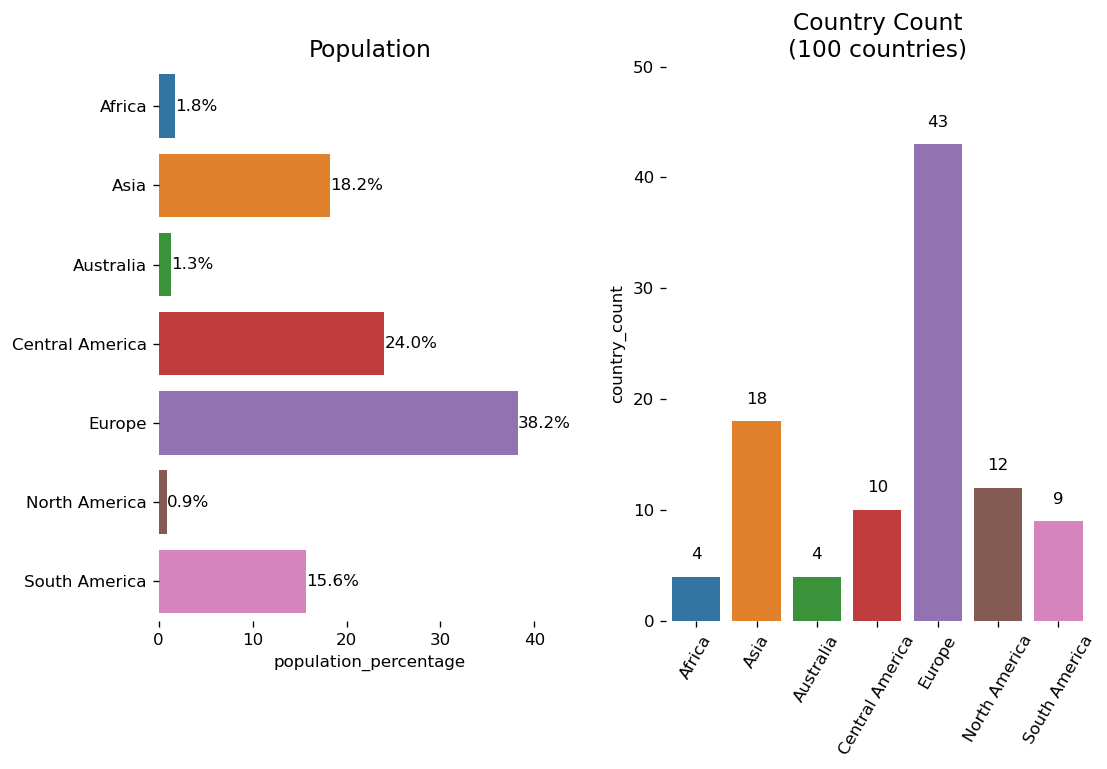

In [44]:
#  population, population percent and country count per continent
df_cont = df.groupby('continent_name')['population'].sum().reset_index()
df_cont['population_percentage'] = df_cont['population']*100/df_cont['population'].sum()

#  countries count per continent
country_continent = df['country'].groupby(df['continent_name']).nunique()

#  add countryCount column to df_cont
df_cont['country_count'] = country_continent[df_cont['continent_name']].values 


#  PLOTs - Population AND Country Count per Continent 
plt.figure(figsize=(10,6), dpi=120)
plt.subplot(121)
ax = sns.barplot(data = df_cont, x = 'population_percentage', y='continent_name')
plt.title('Population', fontsize=14)
plt.xlim([0,45])
plt.ylabel("")
plt.box(False)
for p in ax.patches:
    ax.annotate("{:,.1f}%".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()+.4), ha='left', va='center')

plt.subplot(122)
ax = sns.barplot(data = df_cont, x = 'continent_name', y='country_count')
plt.title('Country Count\n({} countries)'.format(df_cont.country_count.sum()), fontsize=14)
plt.xlabel('')
plt.xticks(rotation = 60)
plt.ylim([0,50])
plt.box(False)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()+2), ha='center', va='center')
    
plt.show()

There are 4 points to keep in mind while doing the analysis as well as creating predictive models:
* Only 4 out of 10 countries are present, meaning 6 countries are missing.
* **China** and **India** accounts for roughly 36% of the global population but are missing
* **Europe** has 43 out of 98 countries in the data and accounts for about 38% of the population
* This analysis is likely to be skewed towards European countries

### Explotory Data Analysis

#### Insights From Considering the Data For 31 Years (1985-2015)

##### --- Which country has the highest suicide rate for the 100,000 population ---

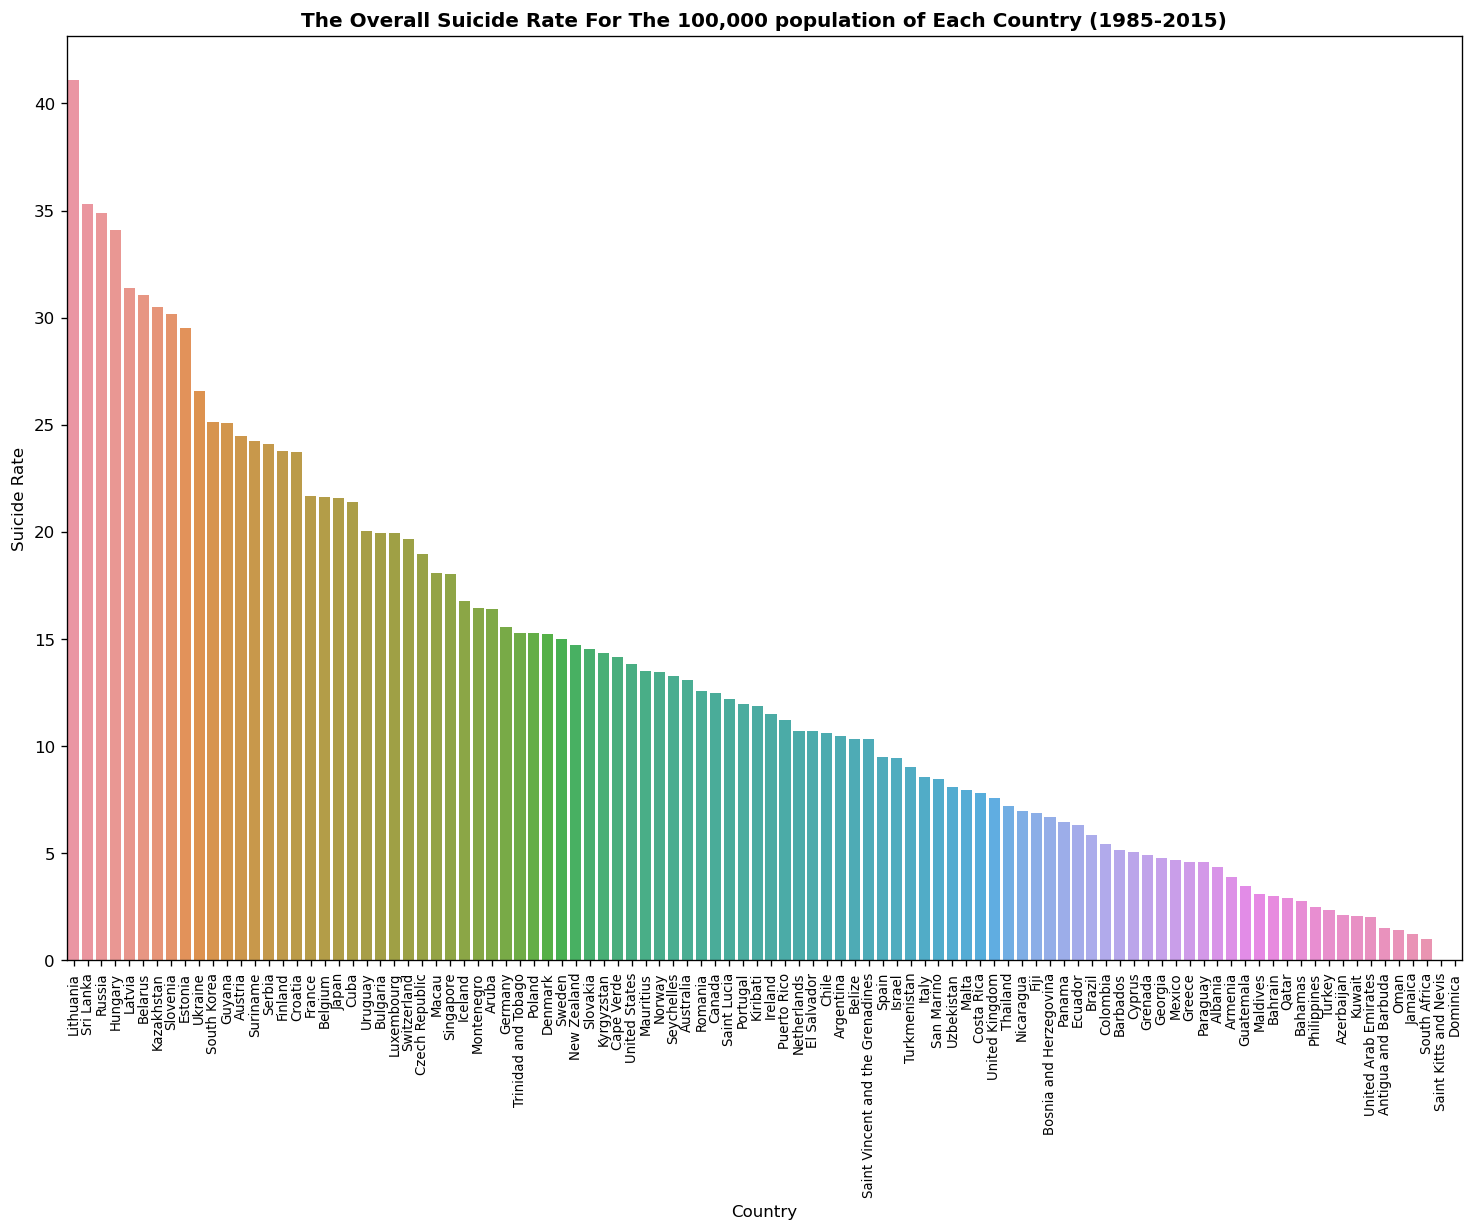

In [45]:
country_list = df.country.unique()
country_suicide_ratio = list()

for country in country_list:
    temp_data = df[df.country == country]
    country_suicide_rate = sum(temp_data['suicides/100k_pop'])/len(temp_data)
    country_suicide_ratio.append(country_suicide_rate)

data = pd.DataFrame({'country_list':country_list, 'country_suicide_ratio':country_suicide_ratio})
new_index = (data['country_suicide_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

# a bar plot
plt.figure(figsize=(15,10), dpi=120)
sns.barplot(x=sorted_data['country_list'], y=sorted_data['country_suicide_ratio'])
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Country',)
plt.ylabel("Suicide Rate")
plt.title('The Overall Suicide Rate For The 100,000 population of Each Country (1985-2015)', fontweight='bold')
plt.show()

Why was Lithuania's suicide rate much higher than other countries?

In accordance with this [blog](https://medium.com/@anna.samoylova/why-does-lithuania-have-so-many-suicides-ceead51d569e) from Medium website, suicide is complicated social due to  a number of reasons contributing to it; however, two highly possible factors of the high suicide rate of this country can be: 
* high alcohol consumption
* wide spread of mental health issues, particularly depression, but lacks of proper mental health facilities and professionals

##### -- How old were those who committed suicide? ---

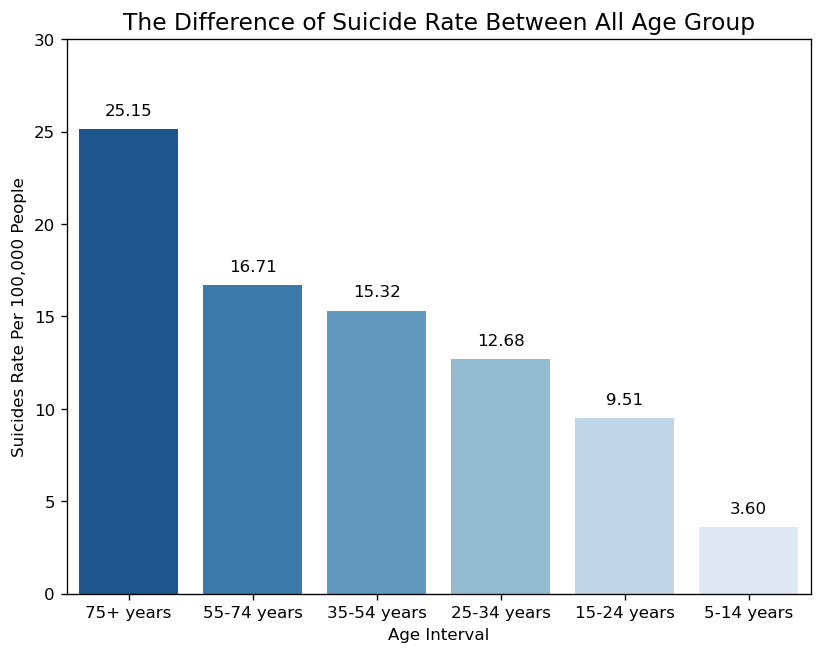

In [92]:
data = df[['age', 'suicides/100k_pop']].groupby(['age'], as_index=False).mean().sort_values(by='suicides/100k_pop', ascending=False)

plt.figure(figsize=(8,6),dpi=120)
sns.set_palette("Blues_r")
ax = sns.barplot(data = data, x = 'age', y='suicides/100k_pop')
plt.title('The Difference of Suicide Rate Between All Age Group (1985-2015)', fontsize=14)
plt.xlabel('Age Interval')
plt.ylabel('Suicides Rate Per 100,000 People')
plt.ylim([0,30])
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()+1), ha='center', va='center')

The oldest group, 75+ years old, has the hightest suicide rate per 100,000 population, while the lowest is of 5-14 year old group. 
<br><br>Why do old people commit suicide? Based on this [blog](https://www.psychologytoday.com/us/blog/understanding-grief/202001/why-do-the-elderly-commit-suicide), an elderly individual is likely to commit suicide due to many possible reasons such as:
* loneliness because of losses of spouse, friends, family, pet, etc.
* physical health problem as well as mental health issues
* (this is my opinion) financial circumstances<br><br>

Why do young people commit suicide? As for the group aged between 5 to 24, despite having the low suicide rate compared to that of the older group, young people might commit suicide because of these reasons:
* academic failure
* bullying, shaming, cyberbullying
* financial problems
* loss of social status
* loss of a close relationship or romantic relationship
* loss of friends or family acceptance due to revealing your sexual orientation

##### --- Gender Ratio of Those Who Committed Suicide ---

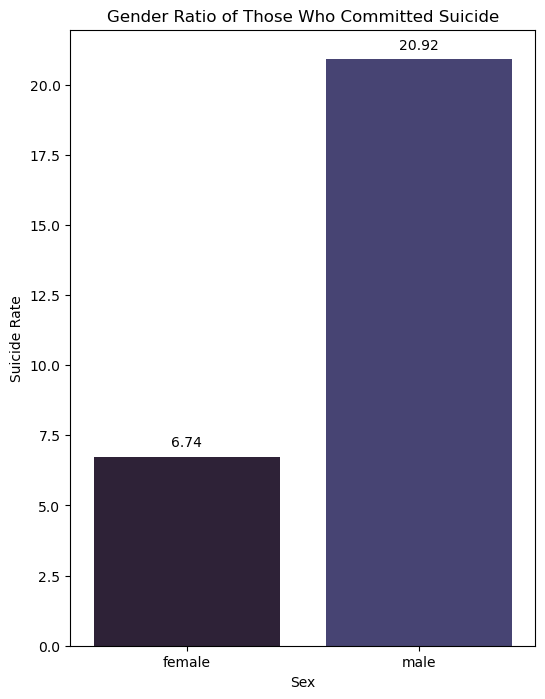

In [74]:
data = df[['sex', 'suicides/100k_pop']].groupby(['sex'], as_index=False).mean()

plt.figure(figsize=(6,8), dpi=100)
sns.set_palette("mako")
ax = sns.barplot(data=data, x='sex',y='suicides/100k_pop')
plt.xlabel("Sex")
plt.ylabel("Suicide Rate Per 100,000 People")
plt.title("Gender Ratio of Those Who Committed Suicide (1985-2015)")

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()+0.5), ha='center', va='center')
    
plt.show()

Surprisingly, the suicide rate among men is about 3 times higher than that of women. Why? According to this [blog](https://www.verywellmind.com/gender-differences-in-suicide-methods-1067508) from __verywellmind__, there a few points to consider:
* women are more likely to attempt suicide than men; nevertheless, men are more likely to die by suicide than women
* men tend to choose more lethal methods than women, making men more likely to complete the process before anyone can intervene.
* popular men's methods are firearms or hanginng while overdosing or medication are most chosen by women.

##### --- The Difference in Suicide Rate Between Generations ---

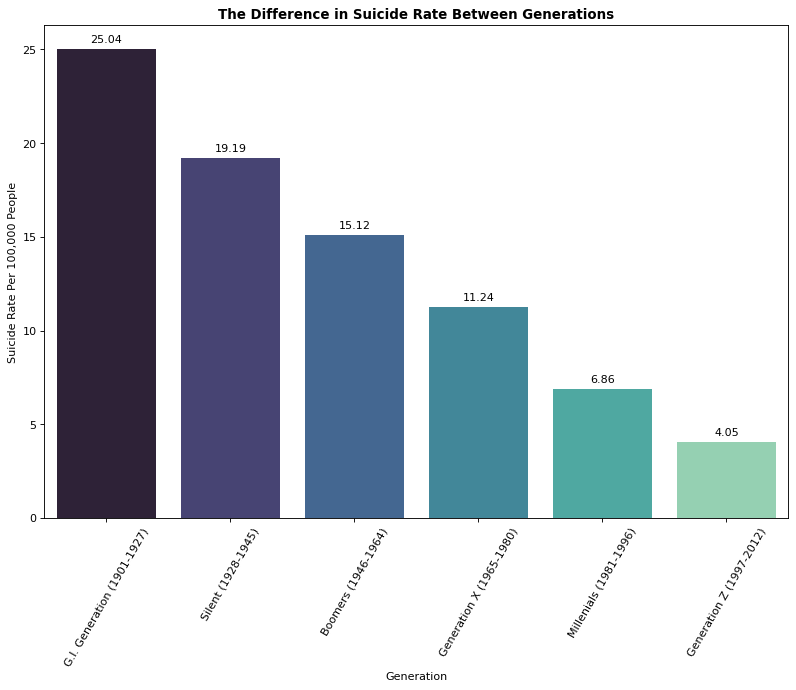

In [95]:
data = df[['generation', 'suicides/100k_pop']].groupby(['generation'], as_index=False).mean()

x_values = ['G.I. Generation (1901-1927)', 'Silent (1928-1945)', 'Boomers (1946-1964)',  'Generation X (1965-1980)', 'Millenials (1981-1996)','Generation Z (1997-2012)']

plt.figure(figsize=(12,8), dpi=80)
sns.set_palette("mako")
ax = sns.barplot(x=x_values,y=data['suicides/100k_pop'][[1, 5, 0, 2, 4, 3]])
plt.xlabel("Generation")
plt.xticks(rotation=60)
plt.ylabel("Suicide Rate Per 100,000 People")
plt.title("The Difference in Suicide Rate Between Generations (1985-2015)", fontweight='bold')

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()+0.5), ha='center', va='center')

As for the bar graph above, we can clearly see that the newer generation is, the less the suicide rate is. There are a multitude of reasons contributing to the decline in suicide rate from generation to generation, and to name a few, 3 obvious factors are:
* an increase in awareness about mental health issues and suicide prevention
* an increase in access to mental health services
* the emergence of social media

### More Detailed Insights Based on Years

##### --- Number of Suicides by Gender Based on Each Year ---

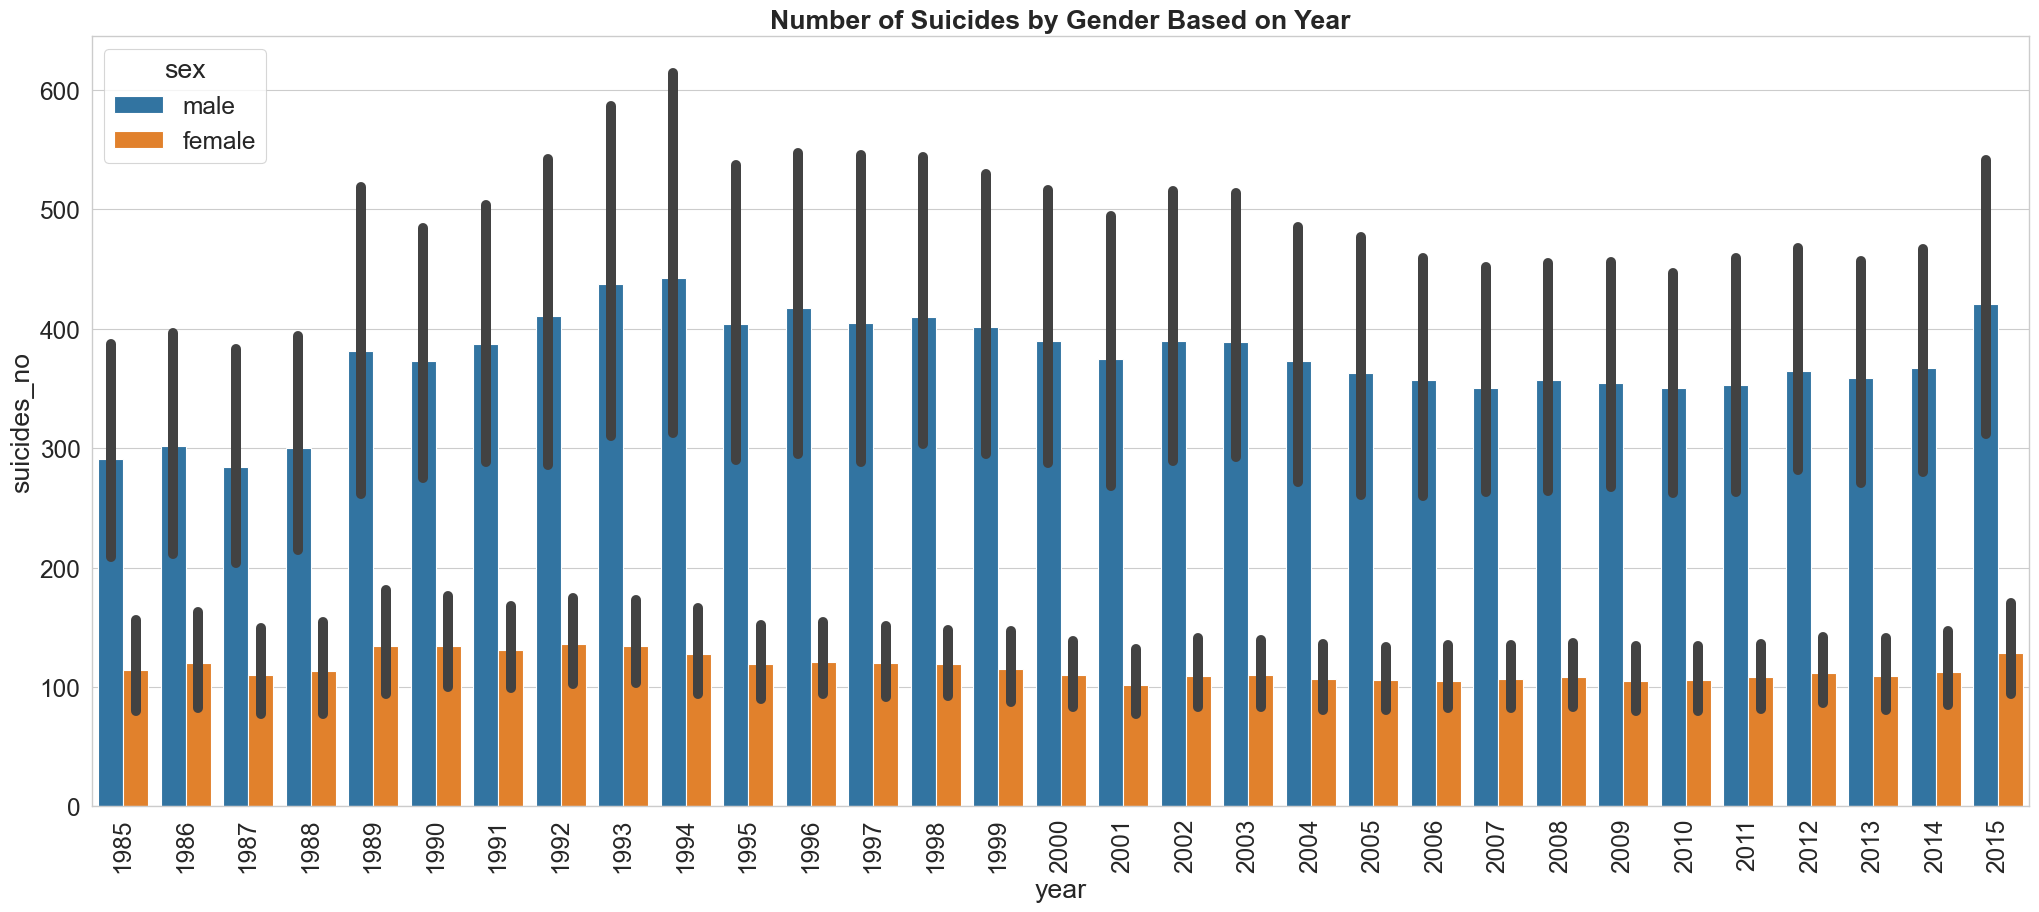

In [107]:
plt.figure(figsize=(25,10), dpi=100)
sns.set_style('whitegrid')
sns.set_palette('tab10')
sns.set_context('paper', 2.0, {"lines.linewidth":4})
sns.barplot(data=df, x='year', y='suicides_no', hue='sex')
plt.title("Number of Suicides by Gender Based on Year", fontweight='bold')
plt.xticks(rotation=90)
plt.show()

This graph can confirm what we've already discussed (male suicides vs. female suicides)

##### --- Number of Suicide by Age Based on Year---

In [ ]:
plt.figure(figsize=(25,10), dpi=100)
sns.set_style('whitegrid')
sns.barplot(data=df, x='year', y='suicides_no', hue='sex')
plt.title("Number of Suicides by Gender Based on Year")
plt.xticks(rotation=90)
plt.show()